# Step 0: Install required packages

In [6]:

!pip install pandas matplotlib seaborn scikit-learn openpyxl


# Step 1: Load Data

In [7]:
import pandas as pd
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Step 2: Preprocessing

In [8]:
df = df.drop(columns=['CustomerID'])
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

# Step 3: Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [10]:
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

# Step 4: Finding Good K with Elbow Method

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

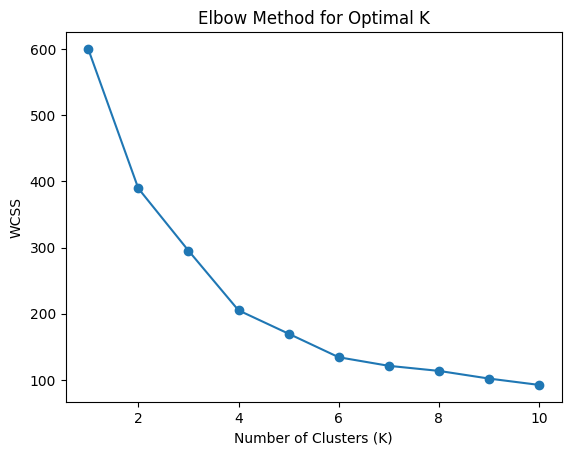

In [12]:
wcss = []
for k in range(1,11):
    wcss.append(KMeans(n_clusters=k, random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

# Step 5: Clustering (choose K=5)

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Visualize Clusters

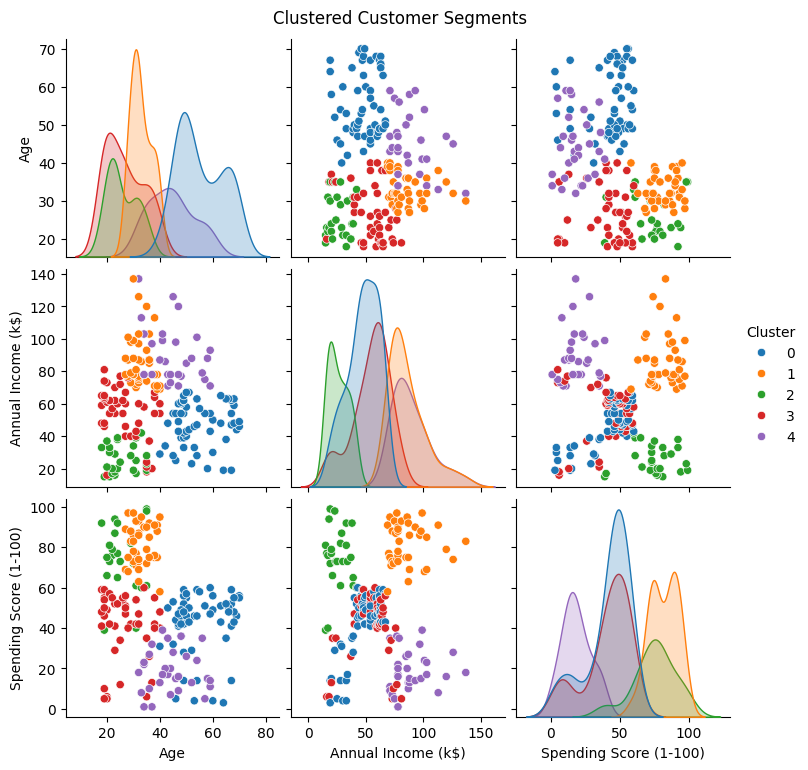

In [14]:
import seaborn as sns
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], palette='tab10')
plt.suptitle("Clustered Customer Segments", y=1.02)
plt.show()

# step 7 :Bar Chart – Customers per Cluster

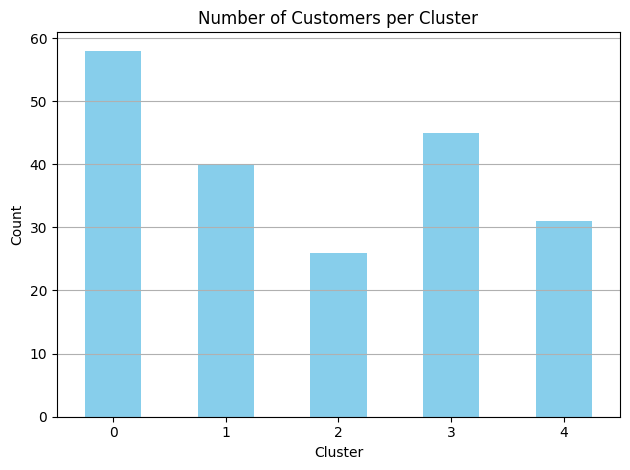

In [18]:
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Step 8: Cluster Profiling

In [15]:
profile = df.groupby('Cluster').agg({
    'Age':'mean',
    'Annual Income (k$)':'mean',
    'Spending Score (1-100)':'mean',
    'Gender':'mean'
}).round(1).rename(columns={'Gender':'Pct_Female'})
print(profile)

profile.to_excel("cluster_profile.xlsx", index=True)
df.to_excel("clustered_customers.xlsx", index=False)

          Age  Annual Income (k$)  Spending Score (1-100)  Pct_Female
Cluster                                                              
0        55.3                47.6                    41.7         0.6
1        32.9                86.1                    81.5         0.6
2        25.8                26.1                    74.8         0.6
3        26.7                54.3                    40.9         0.6
4        44.4                89.8                    18.5         0.5
